# Deep Learning
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_DL_CODE/blob/main/dl05_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Exercise 5 
CNN supplementary code


In [5]:
import numpy as np
import matplotlib.colors as mcolors
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

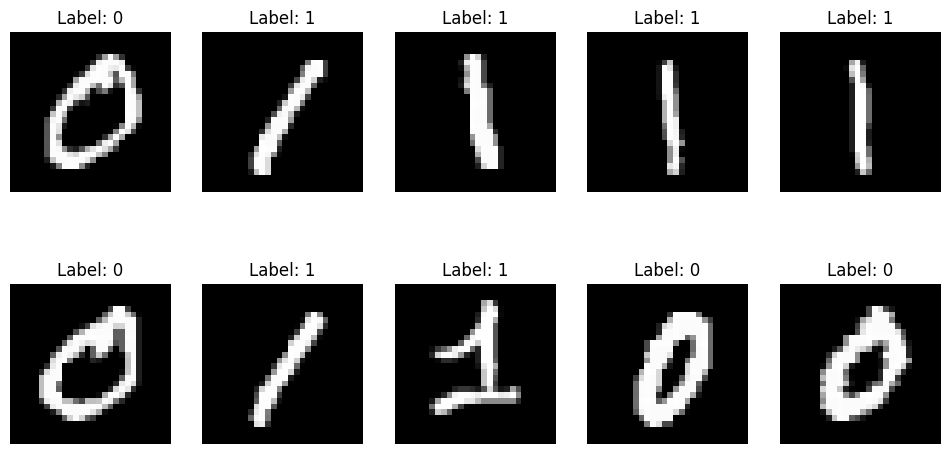

In [6]:
def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    ind01 = np.where((y_train == 1)|(y_train==0))
    X_train = X_train[ind01]
    y_train = y_train[ind01]
    
    ind01 = np.where((y_test == 1)|(y_test==0))
    X_test = X_test[ind01]
    y_test = y_test[ind01]

    
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-1000], X_train[-1000:]
    y_train, y_val = y_train[:-1000], y_train[-1000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)
## Let's look at some example
plt.figure(figsize=[12,6])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.axis("off")
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray');

In [58]:
model = tf.keras.Sequential(
    [
    # tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(16, activation="relu", name="hidden1"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output"),
    ]
    )
model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_val, y_val))

Epoch 1/40
365/365 [==============================] - 1s 894us/step - loss: 0.0333 - accuracy: 0.9920 - val_loss: 0.0028 - val_accuracy: 0.9990
Epoch 2/40
365/365 [==============================] - 0s 685us/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0020 - val_accuracy: 0.9990
Epoch 3/40
365/365 [==============================] - 0s 617us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 6.5236e-04 - val_accuracy: 1.0000
Epoch 4/40
365/365 [==============================] - 0s 626us/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 5.0476e-04 - val_accuracy: 1.0000
Epoch 5/40
365/365 [==============================] - 0s 622us/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 3.8274e-04 - val_accuracy: 1.0000
Epoch 6/40
365/365 [==============================] - 0s 612us/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 5.1892e-04 - val_accuracy: 1.0000
Epoch 7/40
365/365 [==============================] - 0s 610us/step - loss: 9.5373e-04 - accuracy: 0.9998 - val_loss: 3.

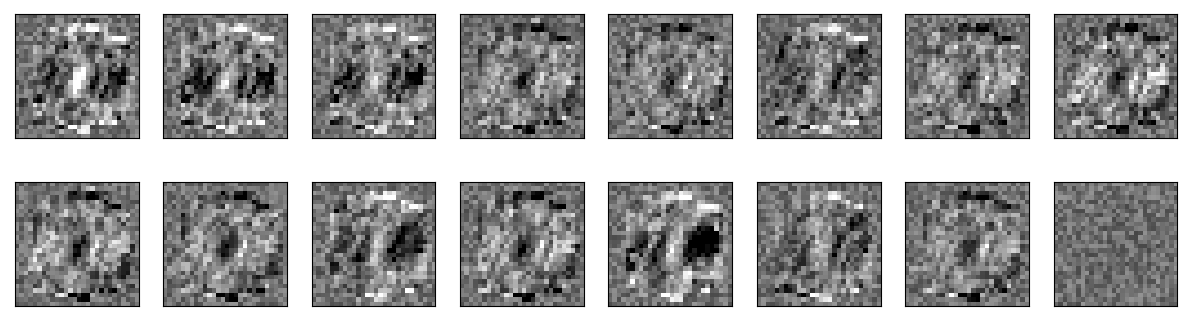

In [59]:
w = np.array(model.layers[0].get_weights()[0])
fig, axes = plt.subplots(2,8, figsize = (15,4))
vmin, vmax = w.min(), w.max()

for i, ax in zip(range(len(w.T)), axes.ravel()):
    coef = w.T[i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    # ax.text(0,-5,'z',4)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [65]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Flatten(input_shape=[28, 28], name="flatten"),
    tf.keras.layers.Dense(300, activation="relu", name="hidden1"),
    tf.keras.layers.Dense(100, activation="relu", name="hidden2"),
    tf.keras.layers.Dense(10, activation="softmax", name="output"),
    ]
    )
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [64]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Flatten(input_shape=[254, 254]),
    tf.keras.layers.Dense(1000, activation="relu", name="hidden1"),
    tf.keras.layers.Dense(100, activation="relu", name="hidden2"),
    tf.keras.layers.Dense(10, activation="softmax", name="output"),
    ]
    )
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 64516)             0         
                                                                 
 hidden1 (Dense)             (None, 1000)              64517000  
                                                                 
 hidden2 (Dense)             (None, 100)               100100    
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 64,618,110
Trainable params: 64,618,110
Non-trainable params: 0
_________________________________________________________________


In [1]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)
images.shape



TensorShape([2, 70, 120, 3])

In [2]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=5)
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 66, 116, 32])

In [3]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding="same")
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 70, 120, 32])

In [4]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same", strides=2)
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

In [5]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [6]:
biases.shape

(32,)

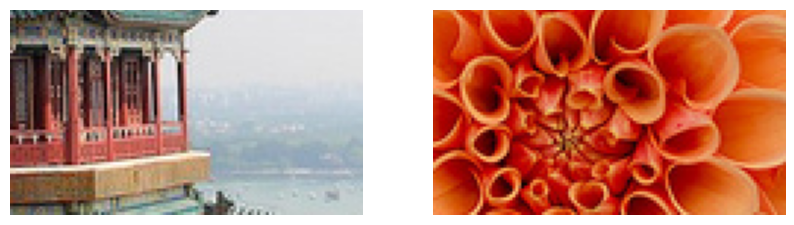

In [7]:
plt.figure(figsize=(10, 5))
for image_idx in (0, 1):
        plt.subplot(1, 2, image_idx+1 )
        plt.imshow(images[image_idx], cmap="gray")
        plt.axis("off")
plt.show()

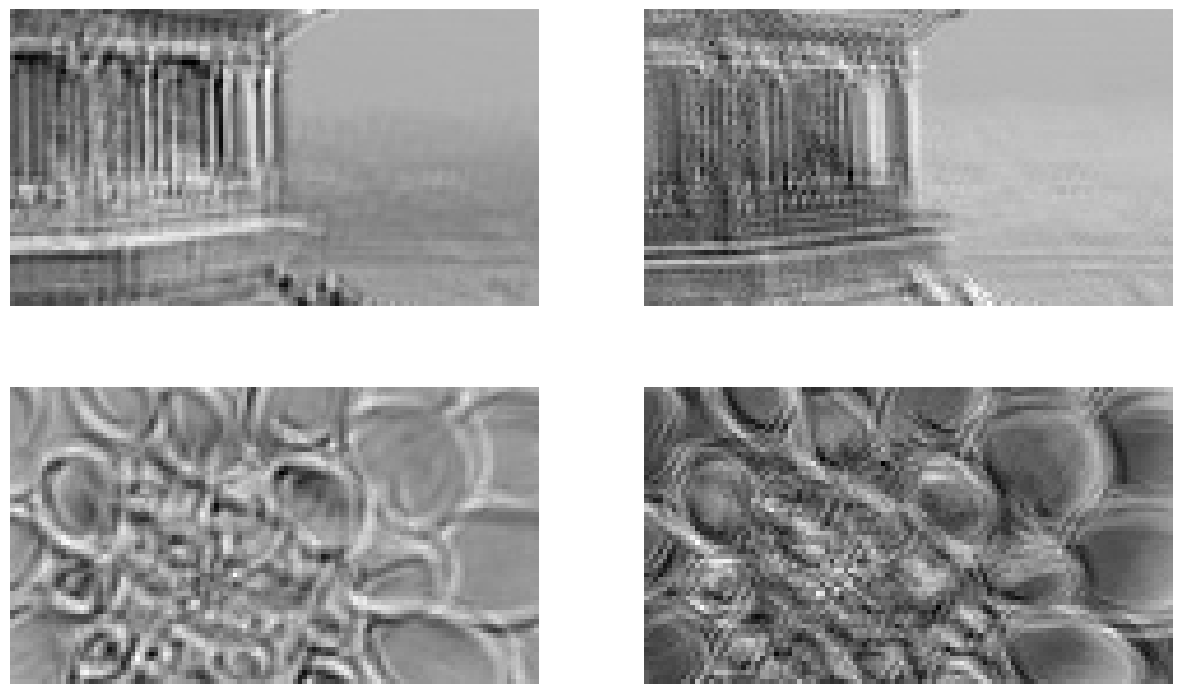

In [8]:
conv_layer = tf.keras.layers.Conv2D(filters=2, kernel_size=7)
fmaps = conv_layer(images)

plt.figure(figsize=(15, 9))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

In [9]:
filters = np.zeros([7, 7, 3, 2])
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
biases = tf.zeros([2])

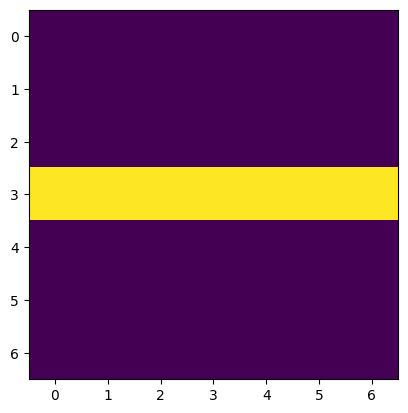

In [10]:
plt.imshow(filters[:,:,0,1])

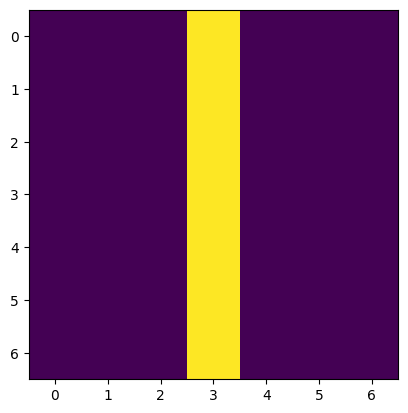

In [11]:
plt.imshow(filters[:,:,0,0])

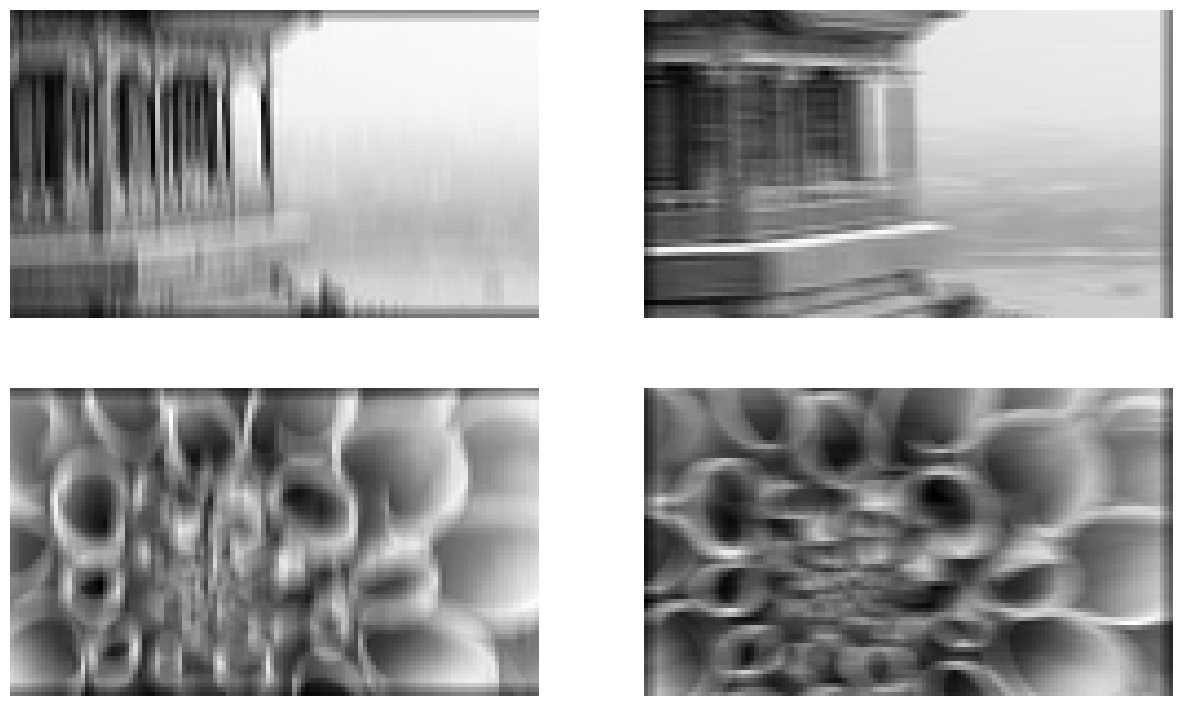

In [12]:
plt.figure(figsize=(15, 9))

fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME") + biases
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

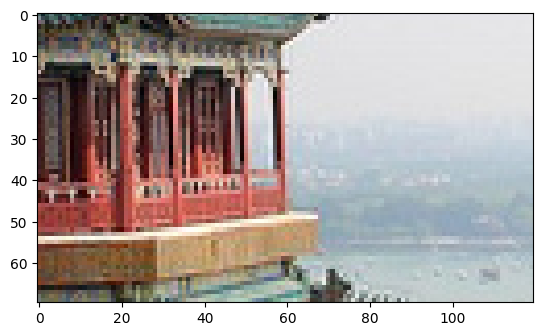

In [13]:
plt.imshow(images[0])

In [14]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)

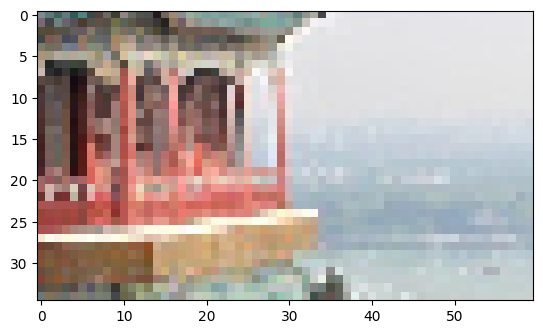

In [15]:
plt.imshow(max_pool(images)[0])